## APPLIED MACHINE LEARNING PROJECT

### Suhas Patil

In [6]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

### Import Data from files to Pandas Dataframe

In [2]:
Audit_Risk = pd.read_csv('audit_risk.csv')
Trials = pd.read_csv('trial.csv')

In [3]:
print(Audit_Risk.shape)
print(Trials.shape)

(776, 27)
(776, 18)


In [4]:
# Selecting columns with same name & values from both csv tables
Common_Cols=set(Audit_Risk.columns).intersection(set(Trials.columns))
Common_Cols

{'History',
 'LOCATION_ID',
 'Money_Value',
 'PARA_A',
 'PARA_B',
 'Risk',
 'Score',
 'Sector_score',
 'TOTAL',
 'numbers'}

In [5]:
# Merging the Audit_Risk and Trials based on common columns
Risk_data = Audit_Risk.merge(Trials, how = 'inner', on = ['History',
 'LOCATION_ID',
 'Money_Value',
 'PARA_A',
 'PARA_B',
 'Risk',
 'Score',
 'Sector_score',
 'TOTAL',
 'numbers'], sort = False)

Risk_data.head()
Risk_data.shape

(629, 35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257936E3E10>,
      dtype=object)

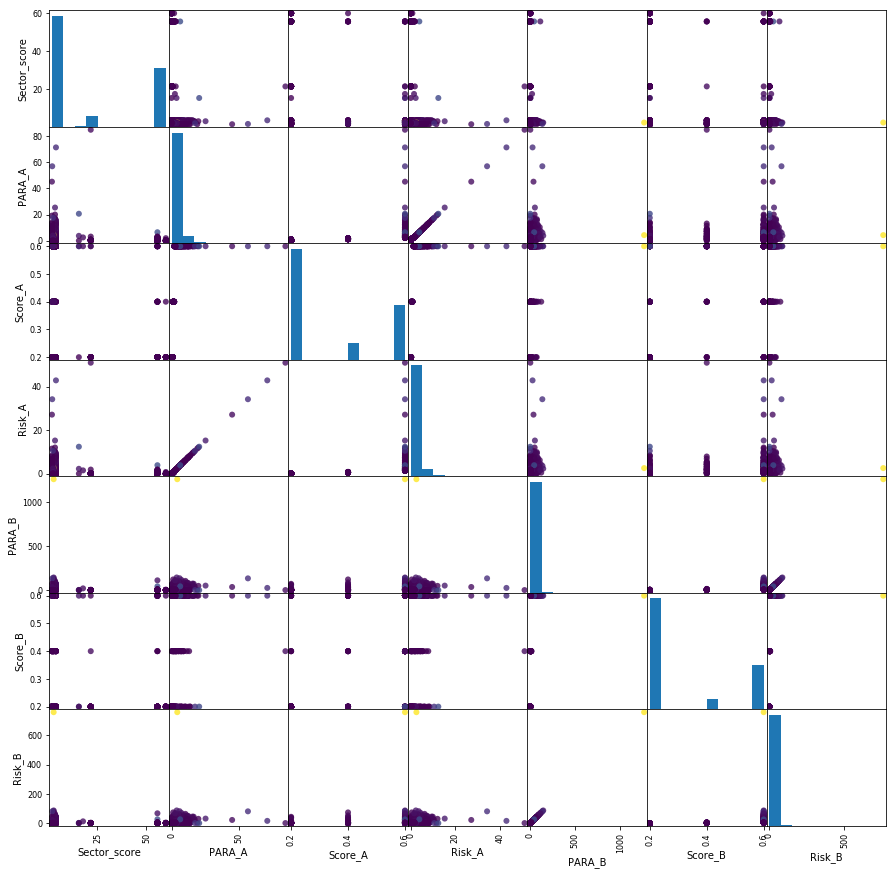

In [6]:
#Graphical exploration of data

%matplotlib inline
from pandas.plotting import scatter_matrix

attributes = Risk_data.columns[:8]
scatter_matrix(Risk_data[attributes], figsize = (15,15),c=Risk_data['Audit_Risk'], alpha = 0.8, marker = 'O')

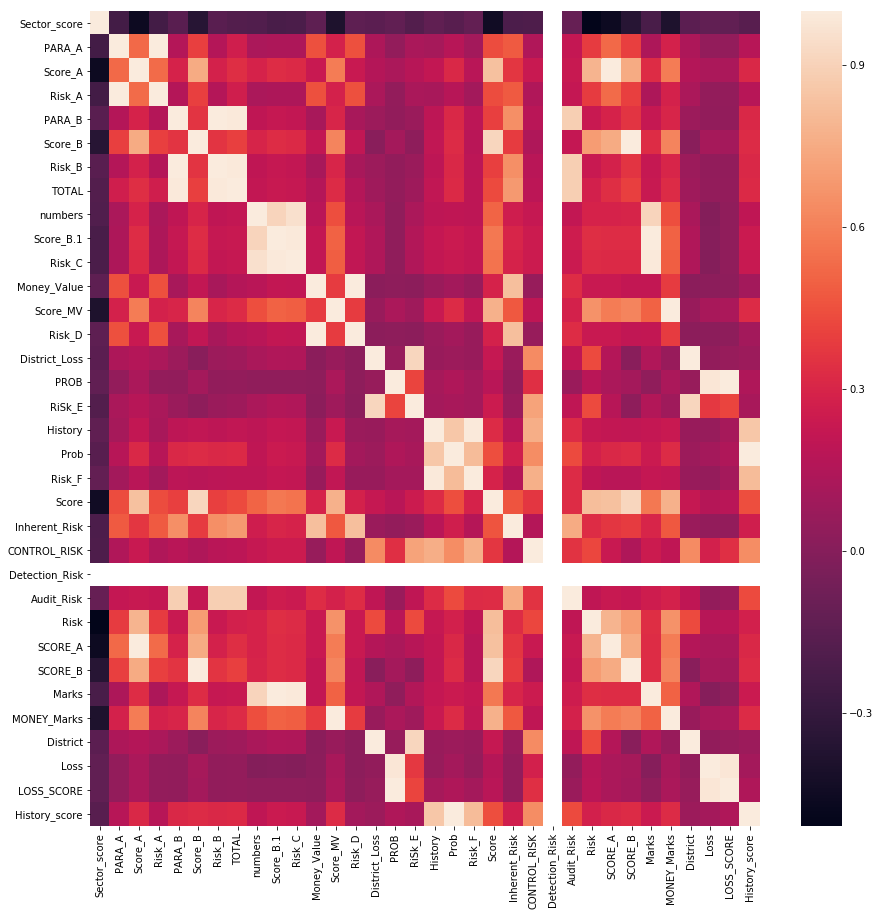

In [7]:
#Checking correlation between the features
plt.figure(figsize= (15,15))
sns.heatmap(Risk_data.corr())

In [8]:
Risk_data.corr()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Sector_score,1.000000,-0.244341,-0.462744,-0.244301,-0.159652,-0.354941,-0.157330,-0.182717,-0.190785,-0.217181,...,-0.111264,-0.510109,-0.462744,-0.354941,-0.217181,-0.389011,-0.155540,-0.128379,-0.132147,-0.162778
PARA_A,-0.244341,1.000000,0.524015,0.999460,0.157794,0.393414,0.157625,0.263090,0.129791,0.136845,...,0.216369,0.383510,0.524015,0.393414,0.136845,0.283638,0.134394,0.048668,0.046604,0.169173
Score_A,-0.462744,0.524015,1.000000,0.531303,0.286292,0.747852,0.284598,0.336559,0.287509,0.328258,...,0.230675,0.784906,1.000000,0.747852,0.328258,0.582575,0.156769,0.129771,0.130066,0.310560
Risk_A,-0.244301,0.999460,0.531303,1.000000,0.160045,0.396850,0.159864,0.265224,0.130208,0.137676,...,0.217444,0.385148,0.531303,0.396850,0.137676,0.285143,0.132753,0.047877,0.045316,0.171515
PARA_B,-0.159652,0.157794,0.286292,0.160045,1.000000,0.361286,0.999940,0.994088,0.202393,0.223443,...,0.887055,0.238326,0.286292,0.361286,0.223443,0.303650,0.077969,0.042934,0.040254,0.311136
Score_B,-0.354941,0.393414,0.747852,0.396850,0.361286,1.000000,0.362001,0.396800,0.292669,0.333048,...,0.215797,0.696150,0.747852,1.000000,0.333048,0.613095,0.011184,0.113874,0.106356,0.327010
Risk_B,-0.157330,0.157625,0.284598,0.159864,0.999940,0.362001,1.000000,0.994008,0.202146,0.223155,...,0.886818,0.236471,0.284598,0.362001,0.223155,0.302130,0.078010,0.043172,0.040524,0.310998
TOTAL,-0.182717,0.263090,0.336559,0.265224,0.994088,0.396800,0.994008,1.000000,0.210004,0.230664,...,0.887373,0.274462,0.336559,0.396800,0.230664,0.326728,0.089218,0.047428,0.044586,0.320876
numbers,-0.190785,0.129791,0.287509,0.130208,0.202393,0.292669,0.202146,0.210004,1.000000,0.906225,...,0.215413,0.288779,0.287509,0.292669,0.906225,0.440302,0.121201,-0.006112,0.032770,0.202007
Score_B.1,-0.217181,0.136845,0.328258,0.137676,0.223443,0.333048,0.223155,0.230664,0.906225,1.000000,...,0.254326,0.333936,0.328258,0.333048,1.000000,0.502720,0.147371,-0.000088,0.033504,0.241330


#### After Careful analysis of the features and their correlation matrices, we can see that all the features of the trials csv are either same as the columns in the Audit Risk table or are derived / highly correlated with the features of the Audit Risk table. 
#### The highly correlated data will provide same information and will not be helpful in developing machine learning models. Hence, we can remove the columns of the Trials table and the features which are highly correlated among eachothers.
#### Similar columns of different scales and highly correlated columns are tallied and one of them is removed


Also, after going through the original published paper related to the data handed, we can see that
Score_A in Audit_Risk multiplied by 10 is the Score_A in trial. 
The same applies to Score_B. Audit_Risk dataset contains 
PROB in Audit_Risk multiplied by 10 is the Loss_Score in trial. 
prob in Audit_Risk multiplied by 10 is the History_Score in trial. 
Score is exactly identical in both Audit_risk and trial datasets. 
Risk_A (calculated from  PARA_A and Score_A) and Risk_B(calculated from  PARA_B and Score_B) which are not present in trial. TOTAL and numbers columns are identical in Audit_Risk and trial. 
Score_B.1 multiplied by 10 is the Marks column in trial. Audit_Risk has an extra column Risk_C(calculated from  numbers and Score_B.1) compared to trial. 
Score_MV in Audit_Risk multiplied by 10 is the Money_Marks column in trial dataset. Risk_D (calculated from Money_Value and Score_MV) is absent in trial. 
Risk column in trial is calculated based on Score value. If Score value is greater than 2, Risk value = 1 else Risk = 0 (No Risk) 

In [9]:
Risk_data=Audit_Risk
Risk_data=Risk_data.drop_duplicates(keep='first')

In [10]:
Risk_data = Risk_data[['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'numbers', 'Money_Value', 'District_Loss', 'PROB', 'History', 'Prob', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk','Audit_Risk', 'Risk']]

In [11]:
Risk_data.shape

(763, 16)

In [12]:
Risk_data.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
PARA_B            False
numbers           False
Money_Value        True
District_Loss     False
PROB              False
History           False
Prob              False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [13]:
#Removing the string value rows in the LOCATION_ID column

Risk_data = Risk_data[Risk_data['LOCATION_ID']!='LOHARU']
Risk_data = Risk_data[Risk_data['LOCATION_ID']!='NUH']
Risk_data = Risk_data[Risk_data['LOCATION_ID']!='SAFIDON']

In [14]:
#Converting the LOCATION_ID column with replaced string values to an int column
Risk_data['LOCATION_ID'] = Risk_data['LOCATION_ID'].astype(int)

In [15]:
#Imputing the missing value in the Money_Value column
Risk_data['Money_Value'] = Risk_data['Money_Value'].replace('', np.nan)
Risk_data['Money_Value'] = Risk_data['Money_Value'].replace(np.nan,Risk_data.Money_Value.mean())

In [16]:
#Checking if the null values in Money_Value are replaced
Risk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 16 columns):
Sector_score      760 non-null float64
LOCATION_ID       760 non-null int32
PARA_A            760 non-null float64
PARA_B            760 non-null float64
numbers           760 non-null float64
Money_Value       760 non-null float64
District_Loss     760 non-null int64
PROB              760 non-null float64
History           760 non-null int64
Prob              760 non-null float64
Score             760 non-null float64
Inherent_Risk     760 non-null float64
CONTROL_RISK      760 non-null float64
Detection_Risk    760 non-null float64
Audit_Risk        760 non-null float64
Risk              760 non-null int64
dtypes: float64(12), int32(1), int64(3)
memory usage: 98.0 KB


In [17]:
#Checking for outliers in the Risk_data dataframe for deciding on the type of scaling to be used
from numpy import mean
from numpy import std

for i in Risk_data:
    data_mean, data_std = mean(Risk_data[i]), std(Risk_data[i])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in Risk_data[i] if x < lower or x > upper]
    print('Identified outliers in ' + i + ': %d' % len(outliers))

Identified outliers in Sector_score: 0
Identified outliers in LOCATION_ID: 0
Identified outliers in PARA_A: 7
Identified outliers in PARA_B: 1
Identified outliers in numbers: 22
Identified outliers in Money_Value: 6
Identified outliers in District_Loss: 0
Identified outliers in PROB: 22
Identified outliers in History: 15
Identified outliers in Prob: 15
Identified outliers in Score: 0
Identified outliers in Inherent_Risk: 7
Identified outliers in CONTROL_RISK: 15
Identified outliers in Detection_Risk: 0
Identified outliers in Audit_Risk: 6
Identified outliers in Risk: 0


In [18]:
Risk_data.var()

Sector_score       583.426956
LOCATION_ID         98.722356
PARA_A              32.811037
PARA_B            2558.747544
numbers              0.071309
Money_Value       4519.845133
District_Loss        1.520311
PROB                 0.001436
History              0.287704
Prob                 0.004714
Score                0.743221
Inherent_Risk     3054.019796
CONTROL_RISK         0.200705
Detection_Risk       0.000000
Audit_Risk        1525.693007
Risk                 0.240316
dtype: float64

#### Removing outliners from the features with high variance

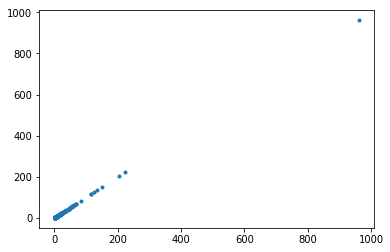

In [19]:
plt.plot(Risk_data['Audit_Risk'],Risk_data['Audit_Risk'],'.')

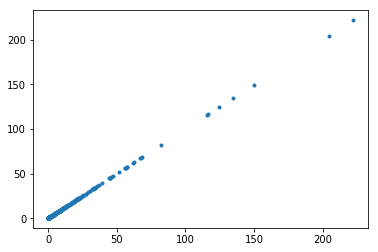

In [20]:
Risk_data=Risk_data[abs(Risk_data['Audit_Risk'])<400]
plt.plot(Risk_data['Audit_Risk'],Risk_data['Audit_Risk'],'.')

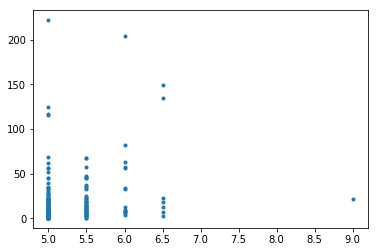

In [21]:
plt.plot(Risk_data['numbers'],Risk_data['Audit_Risk'],'.')

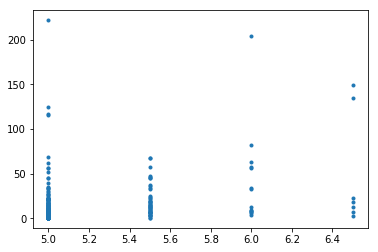

In [22]:
Risk_data=Risk_data[abs(Risk_data['numbers'])<7]
plt.plot(Risk_data['numbers'],Risk_data['Audit_Risk'],'.')

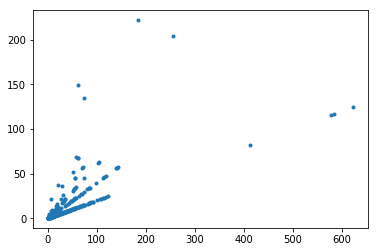

In [23]:
plt.plot(Risk_data['Inherent_Risk'],Risk_data['Audit_Risk'],'.')

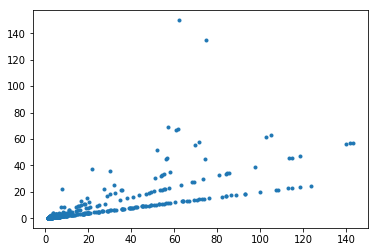

In [24]:
Risk_data=Risk_data[abs(Risk_data['Inherent_Risk'])<175]
plt.plot(Risk_data['Inherent_Risk'],Risk_data['Audit_Risk'],'.')

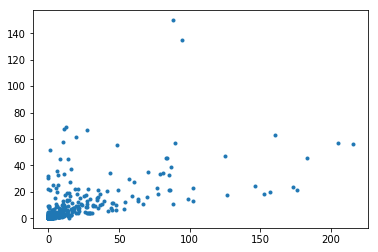

In [25]:
plt.plot(Risk_data['Money_Value'],Risk_data['Audit_Risk'],'.')

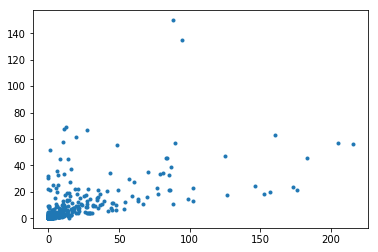

In [26]:
Risk_data=Risk_data[abs(Risk_data['Money_Value'])<250]
plt.plot(Risk_data['Money_Value'],Risk_data['Audit_Risk'],'.')

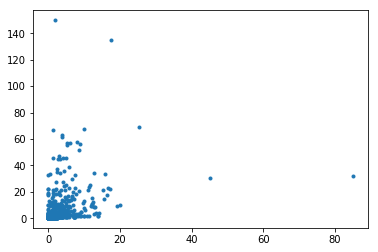

In [27]:
plt.plot(Risk_data['PARA_A'],Risk_data['Audit_Risk'],'.')

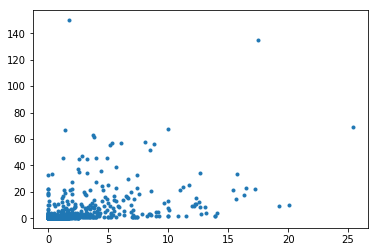

In [28]:
Risk_data=Risk_data[abs(Risk_data['PARA_A'])<40]
plt.plot(Risk_data['PARA_A'],Risk_data['Audit_Risk'],'.')

In [29]:
Risk_data.shape

(750, 16)

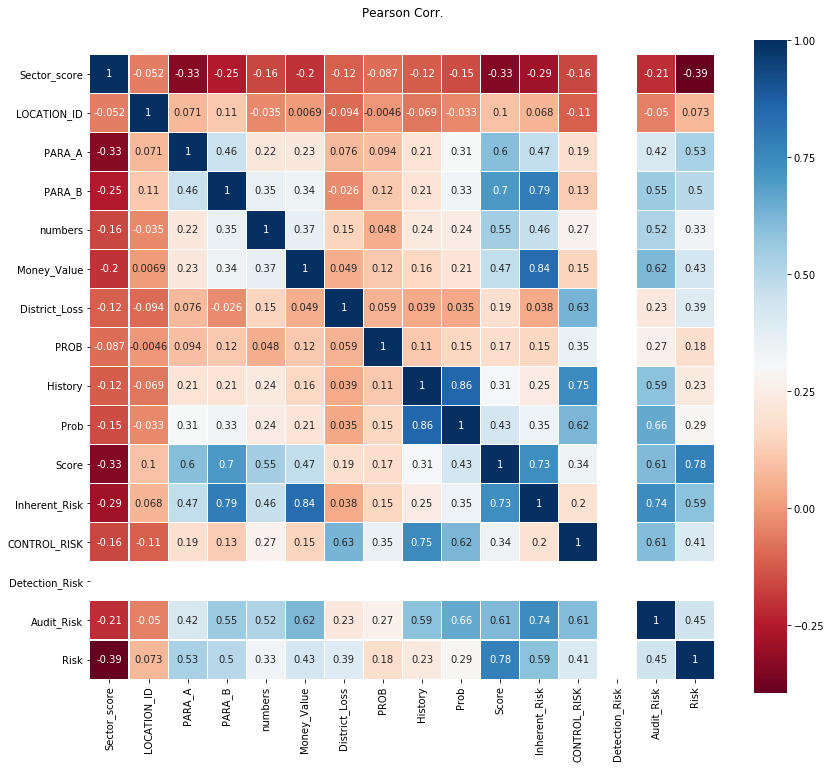

In [30]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Corr.', y=1.05, size=12)
sns.heatmap(Risk_data.astype(float).corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [31]:
# Removing nominal features and selecting features for classification models
Risk_data_class = Risk_data[['Sector_score','numbers','PARA_A', 'PARA_B','Money_Value', 'PROB', 'District_Loss','Inherent_Risk','CONTROL_RISK','History', 'Score', 'Risk']]

In [32]:
# Removing nominal features and selecting features for regression models
Risk_data = Risk_data[['Sector_score','numbers','PARA_A', 'PARA_B','Money_Value', 'PROB', 'District_Loss','Inherent_Risk','CONTROL_RISK','History', 'Score', 'Audit_Risk']]

# Scaling and splitting the data

####  Seperating the target column from the data set

In [33]:
y = Risk_data['Audit_Risk']
X = Risk_data.drop(['Audit_Risk'], axis = 1)

#### Splitting the dataframe into Training and Testing data (defaut split)

In [34]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

#### Scaling the data using Normalisation Z scores

#### Standardscaler:
#### Assumes that data has normally distributed features and will scale them to zero mean and 1 standard deviation. After applying the scaler all features will be of same scale .

#### Minmaxscaler shrinks the data within the range of -1 to 1(if there are negative values)

#### Since our data distribution is Guassian, standard deviation is high, with significant number of outliers, we use the standard  scaler for the models. The models which expect normalisation work well only with standard scaler.

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

In [36]:
score_report_Dict = {}

y

### Bagging linear Regression, Decision Tree, KNN Regressor

In [118]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lreg = LinearRegression()

bag_lreg = BaggingRegressor(lreg, bootstrap = True,oob_score=True,random_state=0)
param_grid = {'n_estimators': [100,200]}
grid_bag_lreg = GridSearchCV(bag_lreg, param_grid, cv = 5,return_train_score=True)
grid_bag_lreg.fit(X_train, y_train)

print("Best parameters: {}".format(grid_bag_lreg.best_params_))
# grid_bag_lreg.cv_results_['params'][grid_bag_lreg.best_index_]

bag_lreg = BaggingRegressor(lreg,n_estimators = grid_bag_lreg.best_params_['n_estimators'],bootstrap = True,oob_score=True,random_state=0)
bag_lreg.fit(X_train, y_train)

print("Train Set Score: {}".format(grid_bag_lreg.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_bag_lreg.score(X_test,y_test)))
print("Oob Score: {}".format(bag_lreg.oob_score_))

Best parameters: {'n_estimators': 100}
Train Set Score: 0.8667003617864919
Test Set Score: 0.6365515731108702
Oob Score: 0.8001744344066328


In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#DecisionTree regressor with Bagging
dt = DecisionTreeRegressor()
bag_dt = BaggingRegressor(dt, bootstrap = True,oob_score=True,random_state=0)
param_grid = {'n_estimators': [50,100,200]}
grid_bag_dt = GridSearchCV(bag_dt, param_grid, cv = 5,return_train_score=True)
grid_bag_dt.fit(X_train, y_train)
print("Best parameters: {}".format(grid_bag_dt.best_params_))

bag_dt = BaggingRegressor(dt, n_estimators=grid_bag_dt.best_params_['n_estimators'], bootstrap=True, random_state=0)
dt_bag_dt = bag_dt.fit(X_train, y_train)

print('Train score: {:.2f}'.format(dt_bag_dt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(dt_bag_dt.score(X_test, y_test)))

Best parameters: {'n_estimators': 200}
Train score: 0.98
Test score: 0.87


In [120]:
#KNeighborsRegressor with Bagging
knn = KNeighborsRegressor()
bag_knn_reg = BaggingRegressor(dt, bootstrap = True,oob_score=True,random_state=0)
param_grid = {'n_estimators': [50,100,200]}
grid_bag_knn = GridSearchCV(bag_knn_reg, param_grid, cv = 5,return_train_score=True)
grid_bag_knn.fit(X_train, y_train)
print("Best parameters: {}".format(grid_bag_knn.best_params_))

bag_knn_reg = BaggingRegressor(knn, n_estimators=grid_bag_knn.best_params_['n_estimators'], bootstrap=True, random_state=0)
knn_bag = bag_knn_reg.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_knn_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_knn_reg.score(X_test, y_test)))

Best parameters: {'n_estimators': 200}
Train score: 0.81
Test score: 0.61


### Pasting Linear Regression, SVR, KNN Regressor

In [121]:
p_lreg = BaggingRegressor(lreg, bootstrap = False,random_state=0)
param_grid = {'n_estimators': [50,100,200]}
grid_p_lreg = GridSearchCV(p_lreg, param_grid, cv = 5,return_train_score=True)
grid_p_lreg.fit(X_train, y_train)
print("Best parameters: {}".format(grid_p_lreg.best_params_))

p_lreg = BaggingRegressor(lreg, n_estimators=grid_p_lreg.best_params_['n_estimators'], bootstrap=False, random_state=0)
p_lreg.fit(X_train, y_train)

#### print("Best parameters: {}".format(grid_p_lreg.best_params_))
print("Train Set Score: {}".format(grid_p_lreg.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_p_lreg.score(X_test,y_test)))

Best parameters: {'n_estimators': 50}
Train Set Score: 0.8676777815803489
Test Set Score: 0.6280151085742525


In [122]:
#SVR - linear with Pasting
svr = SVR(kernel='linear', C=100, gamma='auto')

print("Best parameters: {}".format(grid_p_lreg.best_params_))

p_reg_svr = BaggingRegressor(svr, n_estimators=300, max_samples=100, bootstrap=False, random_state=0)
svr_p = p_reg_svr.fit(X_train, y_train)

print('Train score: {:.2f}'.format(svr_p.score(X_train, y_train)))
print('Test score: {:.2f}'.format(svr_p.score(X_test, y_test)))

Best parameters: {'n_estimators': 50}
Train score: 0.83
Test score: 0.57


In [123]:
#KNeighborsRegressor with Pasting
knn = KNeighborsRegressor(10)
p_reg = BaggingRegressor(knn, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

kn_p = p_reg.fit(X_train, y_train)

print('Train score: {:.2f}'.format(kn_p.score(X_train, y_train)))
print('Test score: {:.2f}'.format(kn_p.score(X_test, y_test)))

Train score: 0.48
Test score: 0.41


### AdaBoost Regression -  Decision Tree, KNN Regression

In [124]:
#AdaBoost with DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

ada_rg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=5), n_estimators=200,
    learning_rate= 0.5, random_state=0)
ada_rg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [125]:
print('Train score: {:.2f}'.format(ada_rg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_rg.score(X_test, y_test)))

Train score: 0.98
Test score: 0.83


### AdaBoost KNN Regression

In [126]:
#AdaBoost with KNeighbors Regressor
from sklearn.ensemble import AdaBoostRegressor

ada_rg = AdaBoostRegressor(
    KNeighborsRegressor(6), n_estimators=500,
    learning_rate=1, random_state=0)
ada_rg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform'),
         learning_rate=1, loss='linear', n_estimators=500, random_state=0)

In [127]:
print('Train score: {:.2f}'.format(ada_rg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_rg.score(X_test, y_test)))

Train score: 0.99
Test score: 0.77


### Gradient Boost Regression

In [128]:
#GradientBoost Regressor
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

# PCA scaling of data

In [129]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [130]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [131]:
pca.n_components_

8

In [132]:
pca.explained_variance_

array([4.25030534, 1.79988419, 1.02717272, 0.99302934, 0.89447051,
       0.71905762, 0.65080134, 0.47912982])

In [133]:
np.sum(pca.explained_variance_ratio_) 

0.9813281053135972

In [134]:
pca = PCA(n_components = pca.n_components_)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

## Regression Tasks on Reduced PCA scaled Data Set

### Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train_reduced, y_train)

print('Train score: %.4f'%lreg.score(X_train_reduced, y_train))
print('Test score: %.4f'%lreg.score(X_test_reduced, y_test))
score_report_Dict.update({"LinearRegression" : [lreg.score(X_train_reduced, y_train), lreg.score(X_test_reduced, y_test)]})

Train score: 0.8356
Test score: 0.6467


Text(0.5,0,'RM')

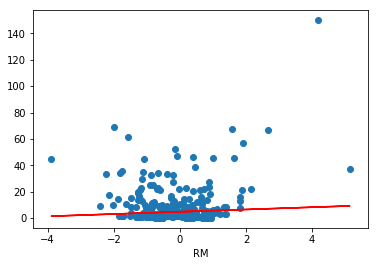

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train_reduced[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

Text(0.5,0,'RM')

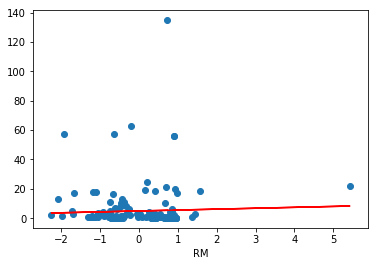

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt

X_test_rm = X_test_reduced[:,5].reshape(-1,1)
lreg.fit(X_test_rm, y_test)
y_predict = lreg.predict(X_test_rm)

plt.plot(X_test_rm, y_predict, c = 'r')
plt.scatter(X_test_rm,y_test)
plt.xlabel('RM')

### Ridge Regression 

In [138]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    train_score_list.append(ridge.score(X_train_reduced,y_train))
    test_score_list.append(ridge.score(X_test_reduced, y_test))

print(train_score_list)
print(test_score_list)

ridge = Ridge(1)
ridge.fit(X_train_reduced,y_train)
ridge.score(X_train_reduced,y_train)
ridge.score(X_test_reduced, y_test)
score_report_Dict.update({"Ridge" : [ridge.score(X_train_reduced, y_train), ridge.score(X_test_reduced, y_test)]})

[0.8356140706922359, 0.8356140648143486, 0.8356134789467864, 0.8355567513088444, 0.8312764500066979]
[0.6467057088520036, 0.6467193745937341, 0.6468551384430556, 0.6481262931995724, 0.6543592777027749]


Text(0.5,0,'$\\alpha$')

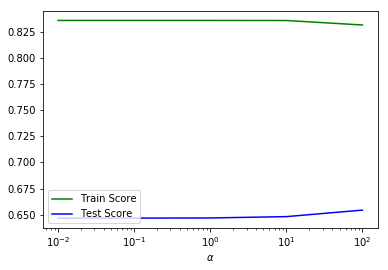

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

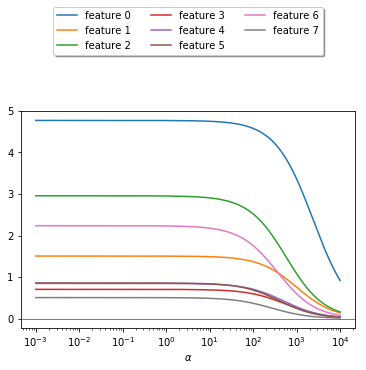

In [140]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [141]:
#Ridge with naive Grid search

from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
best_score = 0
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    score = ridge.score(X_test_reduced, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'x': alpha}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Best score: 0.65
Best parameters: {'x': 100}


In [142]:
from sklearn.model_selection import GridSearchCV
params={'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, params,cv=5,verbose = 1,return_train_score=True) 
grid_search.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [143]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 100}
Best cross-validation score: 0.80


In [144]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001197,3.988981e-04,0.000599,0.000489,0.01,{'alpha': 0.01},0.871943,0.839799,0.638605,0.829244,...,0.779533,0.087660,5,0.829705,0.833728,0.853481,0.832727,0.880966,0.846121,0.019343
1,0.000598,4.885388e-04,0.000200,0.000399,0.1,{'alpha': 0.1},0.871948,0.839793,0.638777,0.829247,...,0.779562,0.087610,4,0.829705,0.833728,0.853481,0.832727,0.880966,0.846121,0.019343
2,0.000798,3.987556e-04,0.000000,0.000000,1,{'alpha': 1},0.872006,0.839733,0.640485,0.829272,...,0.779852,0.087111,3,0.829704,0.833727,0.853479,0.832726,0.880965,0.846120,0.019343
3,0.000998,3.015783e-07,0.000000,0.000000,10,{'alpha': 10},0.872486,0.839101,0.656727,0.829480,...,0.782546,0.082523,2,0.829630,0.833661,0.853337,0.832649,0.880843,0.846024,0.019320
4,0.000997,2.780415e-07,0.000598,0.000488,100,{'alpha': 100},0.871131,0.831554,0.761226,0.828022,...,0.795661,0.065369,1,0.824294,0.828815,0.844084,0.826988,0.872518,0.839340,0.017961


### Lasso Regression 

In [145]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    train_score_list.append(lasso.score(X_train_reduced,y_train))
    test_score_list.append(lasso.score(X_test_reduced, y_test))
    
print(train_score_list)
print(test_score_list)
lasso = Lasso(0.01)
lasso.fit(X_train_reduced,y_train)
lasso.score(X_train_reduced,y_train)
lasso.score(X_test_reduced, y_test)
score_report_Dict.update({"Lasso" : [lasso.score(X_train_reduced, y_train), lasso.score(X_test_reduced, y_test)]})

[0.8356075670822964, 0.8349637038184712, 0.7984642634916204, 0.5319239144383077, 0.0]
[0.6479312716386875, 0.6584451180242488, 0.6790733489059151, 0.4538155751072719, -6.180358066543157e-05]


Text(0.5,0,'$\\alpha$')

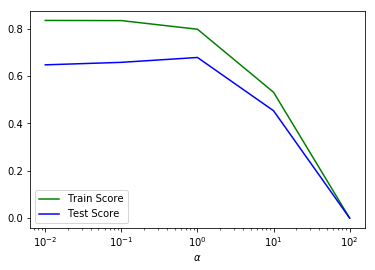

In [146]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

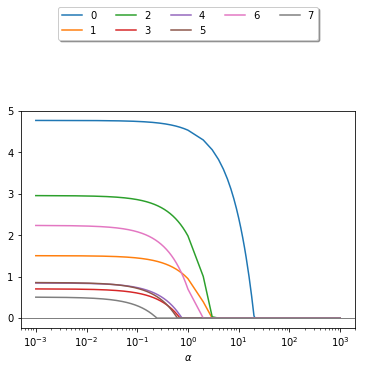

In [148]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = i)

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=5, fancybox=True, shadow=True)
plt.show()

In [149]:
#Lasso with Grid search

from  sklearn.linear_model import Lasso

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
best_score = 0
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    score = lasso.score(X_test_reduced, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'x': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.68
Best parameters: {'x': 1}


In [150]:
from sklearn.model_selection import GridSearchCV
params={'alpha': [0.01, 0.1, 1, 10, 100]}
lso_reg = Lasso()
grid_search = GridSearchCV(lso_reg, params,cv=5,verbose = 1,return_train_score=True) 
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
grid_search.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [151]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.78


In [152]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000997,0.000631,0.000199,0.000399,0.01,{'alpha': 0.01},0.871685,0.839161,6.424584e-01,0.829704,...,0.780097,0.086425,2,0.829700,0.833722,0.853474,0.832721,0.880955,0.846114,0.019341
1,0.000593,0.000484,0.000205,0.000410,0.1,{'alpha': 0.1},0.868886,0.832187,6.756154e-01,0.831939,...,0.783829,0.076328,1,0.829176,0.833175,0.852776,0.832195,0.879940,0.845452,0.019154
2,0.000593,0.000484,0.000399,0.000489,1,{'alpha': 1},0.830647,0.748544,8.648822e-01,0.806554,...,0.778153,0.078724,3,0.798419,0.802191,0.800955,0.799462,0.832924,0.806790,0.013130
3,0.001004,0.000012,0.000398,0.000487,10,{'alpha': 10},0.665713,0.650141,6.467486e-01,0.602219,...,0.574520,0.135472,4,0.547329,0.572779,0.528175,0.526140,0.471665,0.529218,0.033312
4,0.000998,0.000021,0.000593,0.000485,100,{'alpha': 100},-0.006241,-0.021682,-6.779010e-07,-0.001736,...,-0.007224,0.007667,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Polynomial Regression 

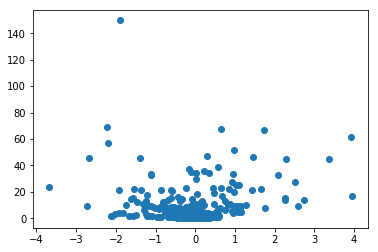

In [153]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import train_test_split
X_train_1 = X_train_reduced[:,7].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [154]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)
score_report_Dict.update({"Polynomial Regression" : [lreg.score(X_train_poly, y_train), lreg.score(X_test_poly, y_test)]})

[0.835614070751628, 0.997628276038591]
[0.6467041894300415, 0.8967169499417077]


Text(0,0.5,'R2-Score')

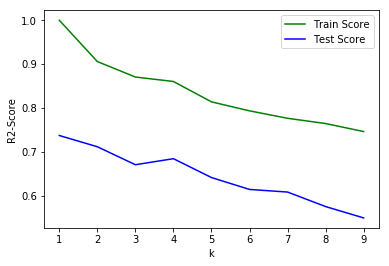

In [155]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_reduced, y_train)
    train_score_array.append(knn_reg.score(X_train_reduced, y_train))
    test_score_array.append(knn_reg.score(X_test_reduced, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('R2-Score')

In [156]:
print(train_score_array)
print(test_score_array)

[1.0, 0.9057839478613281, 0.8704975313906618, 0.8603174159142442, 0.8138417250097332, 0.7933606754926726, 0.7763988357204017, 0.7644265122355629, 0.7461253845553006]
[0.7371640680757934, 0.7115116065467036, 0.6704928174784779, 0.6842667001092541, 0.6412802441034247, 0.6141387609636745, 0.608180505051978, 0.5750649031822792, 0.5491929170736815]


In [157]:
knn_reg = KNeighborsRegressor(6)
knn_reg.fit(X_train_reduced, y_train)   
score_report_Dict.update({"KNeighbors Regressor" : [knn_reg.score(X_train_reduced, y_train), knn_reg.score(X_test_reduced, y_test)]})

In [158]:
param_grid_knn = {
            'leaf_size' : range(1,50),
            'n_neighbors' : range(1,50),
            'p': [1,2],
            'weights': ['distance','uniform'],
            }

CV_knn = GridSearchCV(estimator =knn_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1)
CV_knn.fit(X_train_reduced, y_train)

best_parameters_knn=CV_knn.best_params_
print(best_parameters_knn)

Fitting 3 folds for each of 9604 candidates, totalling 28812 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 1939 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 5939 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 11539 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 18739 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 27539 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 28812 out of 28812 | elapsed:  1.3min finished


{'leaf_size': 1, 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}


In [159]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(CV_knn.cv_results_)
# show the first 5 rows
display(results.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000988,1.349261e-05,0.001995,4.495664e-07,1,1,1,distance,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'we...",0.710390,0.614372,0.520764,0.615345,0.077452,3137,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001671,9.522378e-04,0.001997,8.178998e-04,1,1,1,uniform,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'we...",0.710390,0.614372,0.520764,0.615345,0.077452,3137,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.001992,1.620935e-06,0.002992,8.141992e-04,1,1,2,distance,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'we...",0.663618,0.639879,0.448415,0.584112,0.096314,4264,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.001662,4.697415e-04,0.003324,4.701903e-04,1,1,2,uniform,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'we...",0.663618,0.639879,0.448415,0.584112,0.096314,4264,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.001331,4.691804e-04,0.002658,4.716513e-04,1,2,1,distance,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'we...",0.854888,0.703347,0.575852,0.711618,0.114116,491,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.000997,4.052337e-07,0.002327,4.703026e-04,1,2,1,uniform,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'we...",0.863210,0.715327,0.579866,0.719724,0.115767,344,0.898494,0.931491,0.930288,0.920091,0.015279
6,0.001664,4.712638e-04,0.004653,4.685097e-04,1,2,2,distance,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2, 'we...",0.867193,0.687645,0.565020,0.706905,0.124163,736,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.001995,1.632582e-06,0.004985,8.138098e-04,1,2,2,uniform,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2, 'we...",0.868432,0.690949,0.571245,0.710490,0.122161,638,0.900575,0.935774,0.932536,0.922962,0.015885
8,0.001662,4.701905e-04,0.002327,4.701905e-04,1,3,1,distance,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1, 'we...",0.902353,0.738316,0.520892,0.720844,0.156287,295,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.001662,4.695159e-04,0.001995,5.619580e-07,1,3,1,uniform,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1, 'we...",0.900976,0.748283,0.518025,0.722746,0.157445,246,0.851279,0.832082,0.913955,0.865772,0.034960


In [160]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
y_lin = svr_lin.fit(X_train_reduced, y_train).predict(X_test_reduced)


print("Coefficient shape: ", svr_lin.coef_.shape)
print("Intercept shape: ", svr_lin.intercept_.shape)

score_report_Dict.update({"SVR-Linear" : [svr_lin.score(X_train_reduced, y_train), svr_lin.score(X_test_reduced, y_test)]})

Coefficient shape:  (1, 8)
Intercept shape:  (1,)


In [161]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C= 80, gamma = 1)
svr_rbf.fit(X_train_reduced, y_train).predict(X_test_reduced)
print(svr_rbf.score(X_train_reduced, y_train))
print(svr_rbf.score(X_test_reduced,y_test))

score_report_Dict.update({"SVR-rbf" : [svr_rbf.score(X_train_reduced, y_train), svr_rbf.score(X_test_reduced, y_test)]})

0.9653479131490682
0.3654682785266141


In [162]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly',degree=2, C = 100)
svr_poly.fit(X_train_reduced, y_train).predict(X_test_reduced)

print(svr_poly.score(X_train_reduced,y_train))
print(svr_poly.score(X_test_reduced,y_test))

score_report_Dict.update({"SVR-poly" : [svr_poly.score(X_train_reduced, y_train), svr_poly.score(X_test_reduced, y_test)]})

0.9027399691217288
0.7998411037843246


### Decision Tree Regressor

In [165]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

tree = DecisionTreeRegressor().fit(X_train_reduced, y_train)

pred_train_tree = tree.predict(X_train_reduced)
pred_test_tree = tree.predict(X_test_reduced)

In [166]:
print(" Test R Squared Value : ", r2_score(y_train,pred_train_tree))
print(" Test R Squared Value : ", r2_score(y_test,pred_test_tree))

score_report_Dict.update({"Decision Tree Regressor" : [r2_score(y_train,pred_train_tree), r2_score(y_test,pred_test_tree)]})

 Test R Squared Value :  0.9999999999606402
 Test R Squared Value :  0.7681474934300254


In [13]:
score_report_Dict

NameError: name 'score_report_Dict' is not defined

## Report with PCA

In [12]:
df_reg_with_pca = pd.DataFrame(score_report_Dict)
df_reg_with_pca.rename(index={0: 'Train Score', 1: 'Test Score'})

NameError: name 'score_report_Dict' is not defined

## Report Without PCA 

In [20]:
df_reg_without_pca={'LinearRegression': [0.8676777815803488, 0.6280151085742522],
 'Ridge': [0.8675487179922866, 0.643195841624874],
 'Lasso': [0.8675750108413675, 0.6403188430119134],
 'Polynomial Regression': [1.0, 0.94644671484337],
 'KNeighbors Regressor': [0.7897610591076443, 0.6267853063926181],
 'SVR-Linear': [0.8106293017590854, 0.43509201602940994],
 'SVR-rbf': [0.9645506955574517, 0.34661636384340233],
 'SVR-poly': [0.9722996189390026, 0.6685488125667015],
 'Decision Tree Regressor': [0.9999999999152561, 0.8107906176383087]}

In [21]:
df_reg_without_pca = pd.DataFrame(df_reg_without_pca)
df_reg_without_pca.rename(index={0: 'Train Score', 1: 'Test Score'})

,LinearRegression,Ridge,Lasso,Polynomial Regression,KNeighbors Regressor,SVR-Linear,SVR-rbf,SVR-poly,Decision Tree Regressor
Train Score,0.867678,0.867549,0.867575,1.000000,0.789761,0.810629,0.964551,0.972300,1.000000
Test Score,0.628015,0.643196,0.640319,0.946447,0.626785,0.435092,0.346616,0.668549,0.810791


<img src="reg_Nopca.PNG">

## Best model for regression is  polynomial regressor

# Deep Learning Models - Regression

In [124]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [125]:
from keras import backend as K
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Perceptron - Regression 

In [127]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
#make model
modelRP = Sequential()
#input layer
modelRP.add(Dense(10, input_dim = 11 , activation = 'sigmoid'))
#output layer
modelRP.add(Dense(1))

#compile the model 
modelRP.compile(loss ='mse', optimizer = 'sgd' , metrics = [coeff_determination] )

#train the model
modelRP.fit(X_train, y_train, epochs = 400, batch_size = 128)

#step 4: evaluation
modelRP.evaluate(X_train, y_train)

Epoch 1/400
562/562 [==============================] - 0s 303us/step - loss: 0.5782 - coeff_determination: -1.4544
Epoch 2/400
562/562 [==============================] - 0s 9us/step - loss: 0.4371 - coeff_determination: -0.8307
Epoch 3/400
562/562 [==============================] - 0s 9us/step - loss: 0.3645 - coeff_determination: -0.5270
Epoch 4/400
562/562 [==============================] - 0s 11us/step - loss: 0.3243 - coeff_determination: -0.3629
Epoch 5/400
562/562 [==============================] - 0s 7us/step - loss: 0.2969 - coeff_determination: -0.2441
Epoch 6/400
562/562 [==============================] - 0s 11us/step - loss: 0.2786 - coeff_determination: -0.1768
Epoch 7/400
562/562 [==============================] - 0s 11us/step - loss: 0.2640 - coeff_determination: -0.1155
Epoch 8/400
562/562 [==============================] - 0s 9us/step - loss: 0.2508 - coeff_determination: -0.0524
Epoch 9/400
562/562 [==============================] - 0s 9us/step - loss: 0.2399 - coeff_d

[0.05170567609449298, 0.781113977746183]

In [128]:
modelRP.evaluate(X_test, y_test)

188/188 [==============================] - 0s 32us/step


[0.05484704609881056, 0.754708560223275]

## MLP - Regression 

In [129]:
#make model
modelRM = Sequential()
#input layer
modelRM.add(Dense(10, input_dim = 11 , activation = 'sigmoid'))
#hidden layers
modelRM.add(Dense(10, activation = 'relu'))
modelRM.add(Dense(5, activation = 'relu'))
#output layer
modelRM.add(Dense(1))

#compile the model 
modelRM.compile(loss ='mse', optimizer = 'sgd' , metrics = [coeff_determination] )

#train the model
modelRM.fit(X_train, y_train, epochs = 400, batch_size = 128)

#step 4: evaluation
modelRM.evaluate(X_train, y_train)

Epoch 1/400
562/562 [==============================] - 0s 365us/step - loss: 0.3375 - coeff_determination: -0.4194
Epoch 2/400
562/562 [==============================] - 0s 11us/step - loss: 0.2984 - coeff_determination: -0.2808
Epoch 3/400
562/562 [==============================] - 0s 9us/step - loss: 0.2800 - coeff_determination: -0.1893
Epoch 4/400
562/562 [==============================] - 0s 12us/step - loss: 0.2647 - coeff_determination: -0.1132
Epoch 5/400
562/562 [==============================] - 0s 9us/step - loss: 0.2510 - coeff_determination: -0.0517
Epoch 6/400
562/562 [==============================] - 0s 11us/step - loss: 0.2385 - coeff_determination: -0.0011
Epoch 7/400
562/562 [==============================] - 0s 11us/step - loss: 0.2289 - coeff_determination: 0.0395
Epoch 8/400
562/562 [==============================] - 0s 11us/step - loss: 0.2216 - coeff_determination: 0.0687
Epoch 9/400
562/562 [==============================] - 0s 11us/step - loss: 0.2153 - coeff_

[0.05024247308961013, 0.7868973544908164]

In [130]:
modelRM.evaluate(X_test, y_test)

188/188 [==============================] - 0s 21us/step


[0.050236541223018724, 0.7745479649685799]

# Classification Models

####  Seperating the target column from the data set

In [37]:
y = Risk_data_class['Risk']
X = Risk_data_class.drop(['Risk'], axis = 1)

#### Splitting the dataframe into Training and Testing data (defaut split)

In [38]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

#### Scaling the data using Normalisation Z scores

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

### Voting Classifier

#### 1. Hard Voting Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

C:\Users\speed\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [41]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9787234042553191
KNeighborsClassifier 0.973404255319149
SVC 0.9893617021276596
VotingClassifier 0.9840425531914894


C:\Users\speed\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### 2. Soft voting

In [42]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9787234042553191
KNeighborsClassifier 0.973404255319149
SVC 0.9893617021276596
VotingClassifier 0.9840425531914894


C:\Users\speed\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Model 1: Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_lr = {'C':[0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}

log_reg = LogisticRegression()

grid_LogR = GridSearchCV(log_reg, param_grid = param_lr, cv = 5, scoring='roc_auc',n_jobs=-1)
grid_LogR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [44]:
print("Best cross-validation accuracy: {:.2f}".format(grid_LogR.best_score_))
print("Best parameters: {}".format(grid_LogR.best_params_))
print("Train Set Score: {:.2f}".format(grid_LogR.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(grid_LogR.score(X_test, y_test)))

Best cross-validation accuracy: 1.00
Best parameters: {'C': 100, 'penalty': 'l1'}
Train Set Score: 1.00
Test Set Score: 1.00


In [45]:
LogR_train_predict = grid_LogR.predict(X_train);
LogR_predict = grid_LogR.predict(X_test);

In [46]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(LogR_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(LogR_predict, y_test))

Train roc_auc_score: 1.00
Test roc_auc_score: 0.95 


In [47]:
best_log_reg = LogisticRegression(C=grid_LogR.best_params_['C'],penalty=grid_LogR.best_params_['penalty'])
best_log_reg.fit(X_train, y_train)
prediction = best_log_reg.predict(X_train)

#### Logistic Regression with Bagging 

In [48]:
from sklearn.ensemble import BaggingClassifier

bag_LogR = BaggingClassifier(best_log_reg, bootstrap = True,oob_score=True,random_state=0)
param_grid = {'n_estimators': [100]}
grid_bag_LogR = GridSearchCV(bag_LogR, param_grid, cv = 5,return_train_score=True,n_jobs=-1)
grid_bag_LogR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [49]:
print("Best parameters: {}".format(grid_bag_LogR.best_params_))

Best parameters: {'n_estimators': 100}


In [50]:
best_bag_LogR = BaggingClassifier(best_log_reg,n_estimators = grid_bag_LogR.best_params_['n_estimators'],bootstrap = True,oob_score=True,random_state=0)
best_bag_LogR.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid_bag_LogR.best_score_))
print("Train Set Score: {}".format(grid_bag_LogR.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_bag_LogR.score(X_test,y_test)))
print("Oob Score: {}".format(best_bag_LogR.oob_score_))

Best cross-validation accuracy: 0.99
Train Set Score: 0.998220640569395
Test Set Score: 0.9574468085106383
Oob Score: 0.9893238434163701


#### Logistic Regression with Pasting

In [51]:
p_LogR = BaggingClassifier(best_log_reg, bootstrap = False,random_state=0)
param_grid = {'n_estimators': [100]}
grid_p_LogR = GridSearchCV(p_LogR, param_grid, cv = 5,return_train_score=True,n_jobs=-1)
grid_p_LogR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start...0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [52]:
print("Best cross-validation accuracy: {:.2f}".format(grid_p_LogR.best_score_))
print("Best parameters: {}".format(grid_p_LogR.best_params_))
print("Train Set Score: {}".format(grid_p_LogR.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_p_LogR.score(X_test,y_test)))

Best cross-validation accuracy: 0.99
Best parameters: {'n_estimators': 100}
Train Set Score: 1.0
Test Set Score: 0.9574468085106383


#### Logistic Regression with Adaboost 

In [53]:
from sklearn.ensemble import AdaBoostClassifier

adbst_LogR = AdaBoostClassifier(best_log_reg,random_state=0)
param_grid = {'learning_rate': [0.01,0.1,1.0],
              'n_estimators': [50,100,200]}
grid_adbst_LogR = GridSearchCV(adbst_LogR, param_grid, cv = 5,return_train_score=True,n_jobs=-1)
grid_adbst_LogR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1, 1.0], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [54]:
print("Best cross-validation accuracy: {:.2f}".format(grid_adbst_LogR.best_score_))
print("Best parameters: {}".format(grid_adbst_LogR.best_params_))
print("Train Set Score: {}".format(grid_adbst_LogR.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_adbst_LogR.score(X_test,y_test)))

Best cross-validation accuracy: 0.99
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train Set Score: 0.9911032028469751
Test Set Score: 0.9840425531914894


### Model 2: Decision Trees

In [55]:
from sklearn.tree import DecisionTreeClassifier


param_grid = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8]}
dtree = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtree, param_grid, cv = 5, scoring='roc_auc', return_train_score=True,n_jobs = -1)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [56]:
print("Best cross-validation accuracy: {:.2f}".format(grid_tree.best_score_))
print("Best parameters: {}".format(grid_tree.best_params_))
print("Train Set Score: {}".format(grid_tree.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_tree.score(X_test,y_test)))

Best cross-validation accuracy: 1.00
Best parameters: {'max_depth': 4}
Train Set Score: 1.0
Test Set Score: 0.9444444444444444


In [57]:
best_dtree = DecisionTreeClassifier(max_depth=6)

#### Decision Trees with Bagging

In [58]:
bagging_dt = BaggingClassifier(best_dtree, bootstrap = True,oob_score=True,random_state=0)
param_grid = {'n_estimators': [100, 200, 300]}
grid_bagging_dt = GridSearchCV(bagging_dt, param_grid, cv = 5,return_train_score=True,n_jobs = -1)
grid_bagging_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min....0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
best_bag_dt = BaggingClassifier(best_dtree,n_estimators = grid_bagging_dt.best_params_['n_estimators'],bootstrap = True,oob_score=True,random_state=0)
best_bag_dt.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid_bagging_dt.best_score_))
print("Train Set Score: {}".format(grid_bagging_dt.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_bagging_dt.score(X_test,y_test)))
print("Oob Score: {}".format(best_bag_dt.oob_score_))

Best cross-validation accuracy: 0.99
Train Set Score: 1.0
Test Set Score: 0.9308510638297872
Oob Score: 0.9928825622775801


#### Decision Trees with Pasting

In [60]:
pasting_dt = BaggingClassifier(best_dtree, bootstrap = False)
param_grid = {'n_estimators': [100, 200, 300]}
grid_pasting_dt = GridSearchCV(pasting_dt, param_grid, cv = 5,return_train_score=True,n_jobs = -1)
grid_pasting_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [61]:
best_paste_dt = BaggingClassifier(best_dtree,n_estimators = grid_pasting_dt.best_params_['n_estimators'],bootstrap = True,oob_score=True,random_state=0)
best_paste_dt.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid_bagging_dt.best_score_))
print("Train Set Score: {}".format(grid_bagging_dt.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_bagging_dt.score(X_test,y_test)))
print("Oob Score: {}".format(best_paste_dt.oob_score_))

Best cross-validation accuracy: 0.99
Train Set Score: 1.0
Test Set Score: 0.9308510638297872
Oob Score: 0.9928825622775801


#### Decision Trees with Adaboost

In [62]:
adaboost_dt = AdaBoostClassifier(base_estimator = best_dtree,random_state=0)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [100,200]}
grid_dt = GridSearchCV(adaboost_dt, param_grid, cv = 5,return_train_score=True,n_jobs=-1)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.5, 1.0], 'n_estimators': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [63]:
print("Best cross-validation accuracy: {:.2f}".format(grid_dt.best_score_))
print("Best parameters: {}".format(grid_dt.best_params_))
print("Train Set Score: {}".format(grid_dt.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_dt.score(X_test,y_test)))

Best cross-validation accuracy: 0.99
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train Set Score: 1.0
Test Set Score: 0.9308510638297872


### Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gb = GradientBoostingClassifier(random_state=0)

param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [100,200]}
grid_gb = GridSearchCV(gb, param_grid, cv = 5,return_train_score=True)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.5, 1.0], 'n_estimators': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
print("Best cross-validation accuracy: {:.2f}".format(grid_gb.best_score_))
print("Best parameters: {}".format(grid_gb.best_params_))
print("Train Set Score: {}".format(grid_gb.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_gb.score(X_test,y_test)))

Best cross-validation accuracy: 0.99
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train Set Score: 1.0
Test Set Score: 0.9308510638297872


### PCA

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

In [68]:
X_reduced_train

array([[-0.66715975, -0.30951755, -0.80613946, ...,  0.52728249,
        -0.17006723, -0.29876292],
       [ 1.181926  , -1.16841689, -0.65187986, ..., -0.1959108 ,
        -0.05681147,  1.01323649],
       [-1.03780382,  1.29983317,  0.49391278, ..., -1.20573045,
         0.40824304, -0.0605198 ],
       ...,
       [-1.60586511, -0.16452176,  0.91615788, ..., -0.5992961 ,
         0.07667738, -0.17675819],
       [-1.70052408, -0.14076607,  1.11497159, ..., -0.64981943,
         0.0974226 , -0.08517739],
       [-1.61743255, -0.15940166,  0.93295189, ..., -0.58723139,
         0.07677947, -0.15363676]])

In [69]:
### Explained Variance 
pca.explained_variance_ratio_.sum()

0.9813281053135972

### Model 1: Logistic Regression after PCA

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_lr = {'C':[0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}

log_reg = LogisticRegression()

grid_LogR = GridSearchCV(log_reg, param_grid = param_lr, cv = 5, scoring='roc_auc',n_jobs=-1)
grid_LogR.fit(X_reduced_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [71]:
print("Best cross-validation accuracy: {:.2f}".format(grid_LogR.best_score_))
print("Best parameters: {}".format(grid_LogR.best_params_))
print("Train Set Score: {:.2f}".format(grid_LogR.score(X_reduced_train, y_train)))
print("Test Set Score: {:.2f}".format(grid_LogR.score(X_reduced_test, y_test)))

Best cross-validation accuracy: 1.00
Best parameters: {'C': 1000, 'penalty': 'l1'}
Train Set Score: 1.00
Test Set Score: 0.98


In [72]:
LogR_train_predict = grid_LogR.predict(X_reduced_train);
LogR_predict = grid_LogR.predict(X_reduced_test);

In [73]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(LogR_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(LogR_predict, y_test))

Train roc_auc_score: 0.99
Test roc_auc_score: 0.97 


In [74]:
cv_results = pd.DataFrame.from_dict(grid_LogR.cv_results_)
cv_results[['params','param_penalty','mean_train_score','mean_test_score']]

C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\util

,params,param_penalty,mean_train_score,mean_test_score
0,"{'C': 0.01, 'penalty': 'l1'}",l1,0.991913,0.991634
1,"{'C': 0.01, 'penalty': 'l2'}",l2,0.988021,0.986601
2,"{'C': 0.1, 'penalty': 'l1'}",l1,0.992057,0.990973
3,"{'C': 0.1, 'penalty': 'l2'}",l2,0.992178,0.990118
4,"{'C': 1, 'penalty': 'l1'}",l1,0.998062,0.997012
5,"{'C': 1, 'penalty': 'l2'}",l2,0.996462,0.996018
6,"{'C': 10, 'penalty': 'l1'}",l1,0.999479,0.999206
7,"{'C': 10, 'penalty': 'l2'}",l2,0.999174,0.998940
8,"{'C': 100, 'penalty': 'l1'}",l1,0.999533,0.999339
9,"{'C': 100, 'penalty': 'l2'}",l2,0.999500,0.999273


In [75]:
x_axis = param_lr['C']
l1_trn = cv_results[cv_results['param_penalty']=='l1']['mean_train_score']
l1_tst = cv_results[cv_results['param_penalty']=='l1']['mean_test_score']
l2_trn = cv_results[cv_results['param_penalty']=='l2']['mean_train_score']
l2_tst = cv_results[cv_results['param_penalty']=='l2']['mean_test_score']

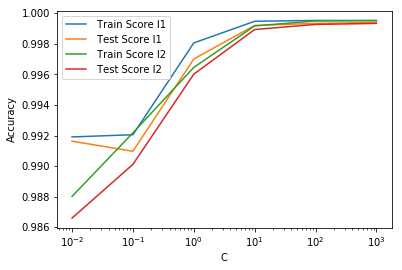

In [76]:
%matplotlib inline
plt.plot(x_axis, l1_trn , label = ' Train Score l1')
plt.plot(x_axis, l1_tst , label = ' Test Score l1')
plt.plot(x_axis, l2_trn , label = ' Train Score l2')
plt.plot(x_axis, l2_tst , label = ' Test Score l2')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.legend()

In [77]:
report_table = [['Logistic', grid_LogR.best_params_, grid_LogR.score(X_reduced_train, y_train), grid_LogR.score(X_reduced_test, y_test), roc_auc_score(LogR_train_predict, y_train), roc_auc_score(LogR_predict, y_test)]]

### Model 2: KNN Classifier after PCA

In [78]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier()
param_Knn = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_Knn = GridSearchCV(Knn, param_grid=param_Knn, cv = 5, scoring='roc_auc',n_jobs=-1)
grid_Knn.fit(X_reduced_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [79]:
print("Best cross-validation accuracy: {:.2f}".format(grid_Knn.best_score_))
print("Best parameters: {}".format(grid_Knn.best_params_))
print("Train Set Score: {:.2f}".format(grid_Knn.score(X_reduced_train, y_train)))
print("Test Set Score: {:.2f}".format(grid_Knn.score(X_reduced_test, y_test)))

Best cross-validation accuracy: 0.99
Best parameters: {'n_neighbors': 15}
Train Set Score: 1.00
Test Set Score: 1.00


In [80]:
Knn_train_predict = grid_Knn.predict(X_reduced_train);
Knn_predict = grid_Knn.predict(X_reduced_test);
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(Knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(Knn_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.96 


In [81]:
cv_results = pd.DataFrame.from_dict(grid_Knn.cv_results_)
cv_results[['params','mean_train_score','mean_test_score']]

C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\util

,params,mean_train_score,mean_test_score
0,{'n_neighbors': 1},1.000000,0.962830
1,{'n_neighbors': 5},0.998439,0.986213
2,{'n_neighbors': 10},0.996983,0.989924
3,{'n_neighbors': 15},0.995876,0.993037
4,{'n_neighbors': 20},0.995994,0.991976


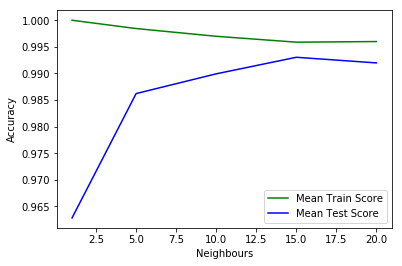

In [82]:
x_axis = cv_results['param_n_neighbors']
%matplotlib inline
plt.plot(x_axis, cv_results['mean_train_score'], label = 'Mean Train Score', c = 'g')
plt.plot(x_axis, cv_results['mean_test_score'], label = 'Mean Test Score', c='b')
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
plt.legend()

In [83]:
report_table = report_table+[['Knn Classifier', grid_Knn.best_params_, grid_Knn.score(X_reduced_train, y_train), grid_Knn.score(X_reduced_test, y_test), roc_auc_score(Knn_train_predict, y_train), roc_auc_score(Knn_predict, y_test) ]]

### Model 3: Linear SVC after PCA

In [84]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
param_LSVC = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid for Linear SVC: {}".format(param_LSVC))

Parameter grid for Linear SVC: {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [85]:
grid_LSVC = GridSearchCV(LSVC, param_grid=param_LSVC, cv = 5, scoring='roc_auc', return_train_score=True,n_jobs=-1)
grid_LSVC.fit(X_reduced_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [86]:
LSCV_predict_train = grid_LSVC.predict(X_reduced_train)
LSCV_predict = grid_LSVC.predict(X_reduced_test)

In [87]:
print("Best cross-validation accuracy: {:.2f}".format(grid_LSVC.best_score_))
print("Best parameters: {}".format(grid_LSVC.best_params_))
print("Train Set Score: {:.2f}".format(grid_LSVC.score(X_reduced_train, y_train)))
print("Test Set Score: {:.2f}".format(grid_LSVC.score(X_reduced_test, y_test)))

Best cross-validation accuracy: 1.00
Best parameters: {'C': 10}
Train Set Score: 1.00
Test Set Score: 0.99


In [88]:
report_table = report_table + [['Linear SVC', grid_LSVC.best_params_, grid_LSVC.score(X_reduced_train, y_train), 
                                grid_LSVC.score(X_reduced_test, y_test), 
                                roc_auc_score(LSCV_predict_train, y_train), 
                                roc_auc_score(LSCV_predict, y_test)]]

### Model 4: SVC kernel 'Linear' after PCA

In [89]:
from sklearn.svm import SVC, LinearSVC

svc_linear = SVC(kernel = 'linear') 
param_grid = {'C':[0.01, 0.1, 1, 10]}
print("Parameter grid for Linear SVM: {}".format(param_grid))

Parameter grid for Linear SVM: {'C': [0.01, 0.1, 1, 10]}


In [90]:
grid_svcLinear = GridSearchCV(svc_linear, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='roc_auc')
grid_svcLinear.fit(X_reduced_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [91]:
cv_results = pd.DataFrame.from_dict(grid_svcLinear.cv_results_)
cv_results[['params','mean_train_score','mean_test_score']]

C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\util

,params,mean_train_score,mean_test_score
0,{'C': 0.01},0.989524,0.986622
1,{'C': 0.1},0.994708,0.993699
2,{'C': 1},0.998690,0.998138
3,{'C': 10},0.999388,0.999404


In [92]:
print("Best cross-validation score: {:.2f}".format(grid_svcLinear.best_score_))
print('Best penalty term:',grid_svcLinear.best_params_)
print("Training Score: {:.2f}".format(grid_svcLinear.score(X_reduced_train, y_train)))
print("Testing Score: {:.2f}".format(grid_svcLinear.score(X_reduced_test, y_test)))

Best cross-validation score: 1.00
Best penalty term: {'C': 10}
Training Score: 1.00
Testing Score: 0.98


In [93]:
svcLinear_predict_train = grid_svcLinear.predict(X_reduced_train);
svcLinear_predict = grid_svcLinear.predict(X_reduced_test);

In [94]:
report_table = report_table + [['SVC Linear Kernalized', 'C = 10', grid_svcLinear.score(X_reduced_train, y_train), 
                                grid_svcLinear.score(X_reduced_test, y_test), 
                                roc_auc_score(svcLinear_predict_train, y_train), 
                                roc_auc_score(svcLinear_predict, y_test)]]

### Model 5: SVC kernel 'RBF' after PCA

In [95]:
svc_rbf = SVC(kernel = 'rbf') 
param_grid = {'C':[0.01, 0.1, 1, 10], 'gamma':[0.01,0.1,1,10]}
print("Parameter grid for Linear SVR: {}".format(param_grid))

grid_svcRbf = GridSearchCV(svc_rbf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='roc_auc')
grid_svcRbf.fit(X_reduced_train, y_train)

Parameter grid for Linear SVR: {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [96]:
print("Best cross-validation score: {:.2f}".format(grid_svcRbf.best_score_))
print('Best parameters term:',grid_svcRbf.best_params_)
print("Training Score: {:.4f}".format(grid_svcRbf.score(X_reduced_train, y_train)))
print("Testing Score: {:.4f}".format(grid_svcRbf.score(X_reduced_test, y_test)))

Best cross-validation score: 1.00
Best parameters term: {'C': 10, 'gamma': 0.1}
Training Score: 0.9992
Testing Score: 0.9987


In [97]:
y_svcRbf_predict_train = grid_svcRbf.predict(X_reduced_train)
y_svcRbf_predict = grid_svcRbf.predict(X_reduced_test)

In [98]:
report_table = report_table + [['SVC RBF Kernalized', 'C = 10, Gamma = 0.01', grid_svcRbf.score(X_reduced_train, y_train), grid_svcRbf.score(X_reduced_test, y_test), roc_auc_score(y_svcRbf_predict_train, y_train), roc_auc_score(y_svcRbf_predict, y_test)]]

### Model 6: SVC Kernel 'Poly'

In [99]:
svc_poly = SVC(degree = 2) 
param_grid = {'C':[0.01, 0.1, 1, 10]}

grid_svcPoly = GridSearchCV(svc_poly, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='roc_auc')
grid_svcPoly.fit(X_reduced_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [100]:
cv_results = pd.DataFrame.from_dict(grid_svcPoly.cv_results_)
cv_results[['param_C','mean_train_score','mean_test_score']]

C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\util

,param_C,mean_train_score,mean_test_score
0,0.01,0.988268,0.987032
1,0.1,0.992800,0.990801
2,1,0.997892,0.996348
3,10,0.999343,0.997942


In [101]:
y_svcPoly_predict_train = grid_svcPoly.predict(X_reduced_train);
y_svcPoly_predict = grid_svcPoly.predict(X_reduced_test);

In [102]:
report_table = report_table + [['SVC Poly', 'C = 10', grid_svcPoly.score(X_reduced_train, y_train), 
                                grid_svcPoly.score(X_reduced_test, y_test), 
                                roc_auc_score(y_svcPoly_predict_train, y_train), 
                                roc_auc_score(y_svcPoly_predict, y_test)]]

### Model 7: Decision Trees after PCA

In [103]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':[1, 2, 3, 4, 5, 6]}
dtree = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtree, param_grid, cv = 5, scoring='roc_auc', return_train_score=True,n_jobs=-1)
grid_tree.fit(X_reduced_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [104]:
dtree_predict_train = grid_tree.predict(X_reduced_train);
dtree_predict = grid_tree.predict(X_reduced_test);

In [105]:
report_table = report_table + [['Decision Tree', 'max_depth = 4', grid_tree.score(X_reduced_train, y_train), 
                                grid_tree.score(X_reduced_test, y_test), 
                                roc_auc_score(dtree_predict_train, y_train), 
                                roc_auc_score(dtree_predict, y_test)]]

In [106]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 
                                              'Test accuracy', 'Train auc score', 'Test auc score'])

## Model results with PCA

In [107]:
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,Logistic,"{'C': 1000, 'penalty': 'l1'}",0.999537,0.981702,0.991084,0.970546
1,Knn Classifier,{'n_neighbors': 15},0.996309,0.995185,0.963052,0.963852
2,Linear SVC,{'C': 10},0.999471,0.986277,0.993339,0.966053
3,SVC Linear Kernalized,C = 10,0.999206,0.984832,0.990428,0.966053
4,SVC RBF Kernalized,"C = 10, Gamma = 0.01",0.999167,0.998676,0.983798,0.981801
5,SVC Poly,C = 10,0.999312,0.997111,0.985238,0.981801
6,Decision Tree,max_depth = 4,0.990800,0.975262,0.965153,0.911298


## Model results without PCA

<img src="class_Nopca.PNG">

## Conclusion

After carefully implementing all the models with and without PCA, we come to the conclusion that 'SVC Linear Kernelized without PCA' gives us the best test accuracy of 99.46% and test AUC of 0.9615. Also, since the change is not very significant with original and reduced dataset, we can conclude that original dataset can be used for our analysis.

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import recall_score, precision_score

Using TensorFlow backend.


In [111]:
model = Sequential()
model.add(Dense(15,input_dim=11,activation='sigmoid'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
562/562 [==============================] - 0s 722us/step - loss: 0.6706 - acc: 0.6032


In [112]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

188/188 [==============================] - 0s 202us/step

acc: 62.23%


In [121]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

188/188 [==============================] - 0s 21us/step


[0.630642980971235, 0.6223404268000988]

In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 15)                180       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________
